# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load and Understand the data

In [2]:
df=pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
#df.drop('fbs', axis=1, inplace=True)

In [4]:
#df.drop('restecg', axis=1, inplace=True)

In [5]:
df.shape

(908, 13)

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [10]:
df['thal'].nunique()

3

# EDA

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [12]:
## One-Hot Encoding for multi-category nominal columns
#df=pd.get_dummies(df,columns=['cp','thal','restecg','slope'],drop_first=True)

In [13]:
# First convert any string-like True/False to boolean
df['sex'] = df['sex'].astype(bool)
df['exang'] = df['exang'].astype(bool)


In [14]:
df['sex'] = df['sex'].astype(int)
df['exang'] = df['exang'].astype(int)
df['fbs']=df['fbs'].astype(int)

In [15]:
# Convert 'num' to binary: 0 = no disease, 1 = disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
#df['num'].replace([0,1,2,3,4],['no disease','low','medium','high','very high'], inplace=True)

In [17]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [18]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,846.000000,846.0,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,53.425532,1.0,0.763593,132.449173,202.652482,0.186761,0.959811,137.167849,0.394799,0.891253,1.154846,1.196217,0.553191
std,9.099243,0.0,0.948820,19.243667,111.654072,0.389950,0.619824,25.608434,0.489097,1.093875,0.688636,0.729292,0.497457
min,29.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,1.0,0.000000,120.000000,177.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.0,0.000000,130.000000,225.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.0,2.000000,140.000000,269.750000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,1.000000
max,77.000000,1.0,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,1.000000


In [20]:

from sklearn.preprocessing import StandardScaler
x= df.drop("num", axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)


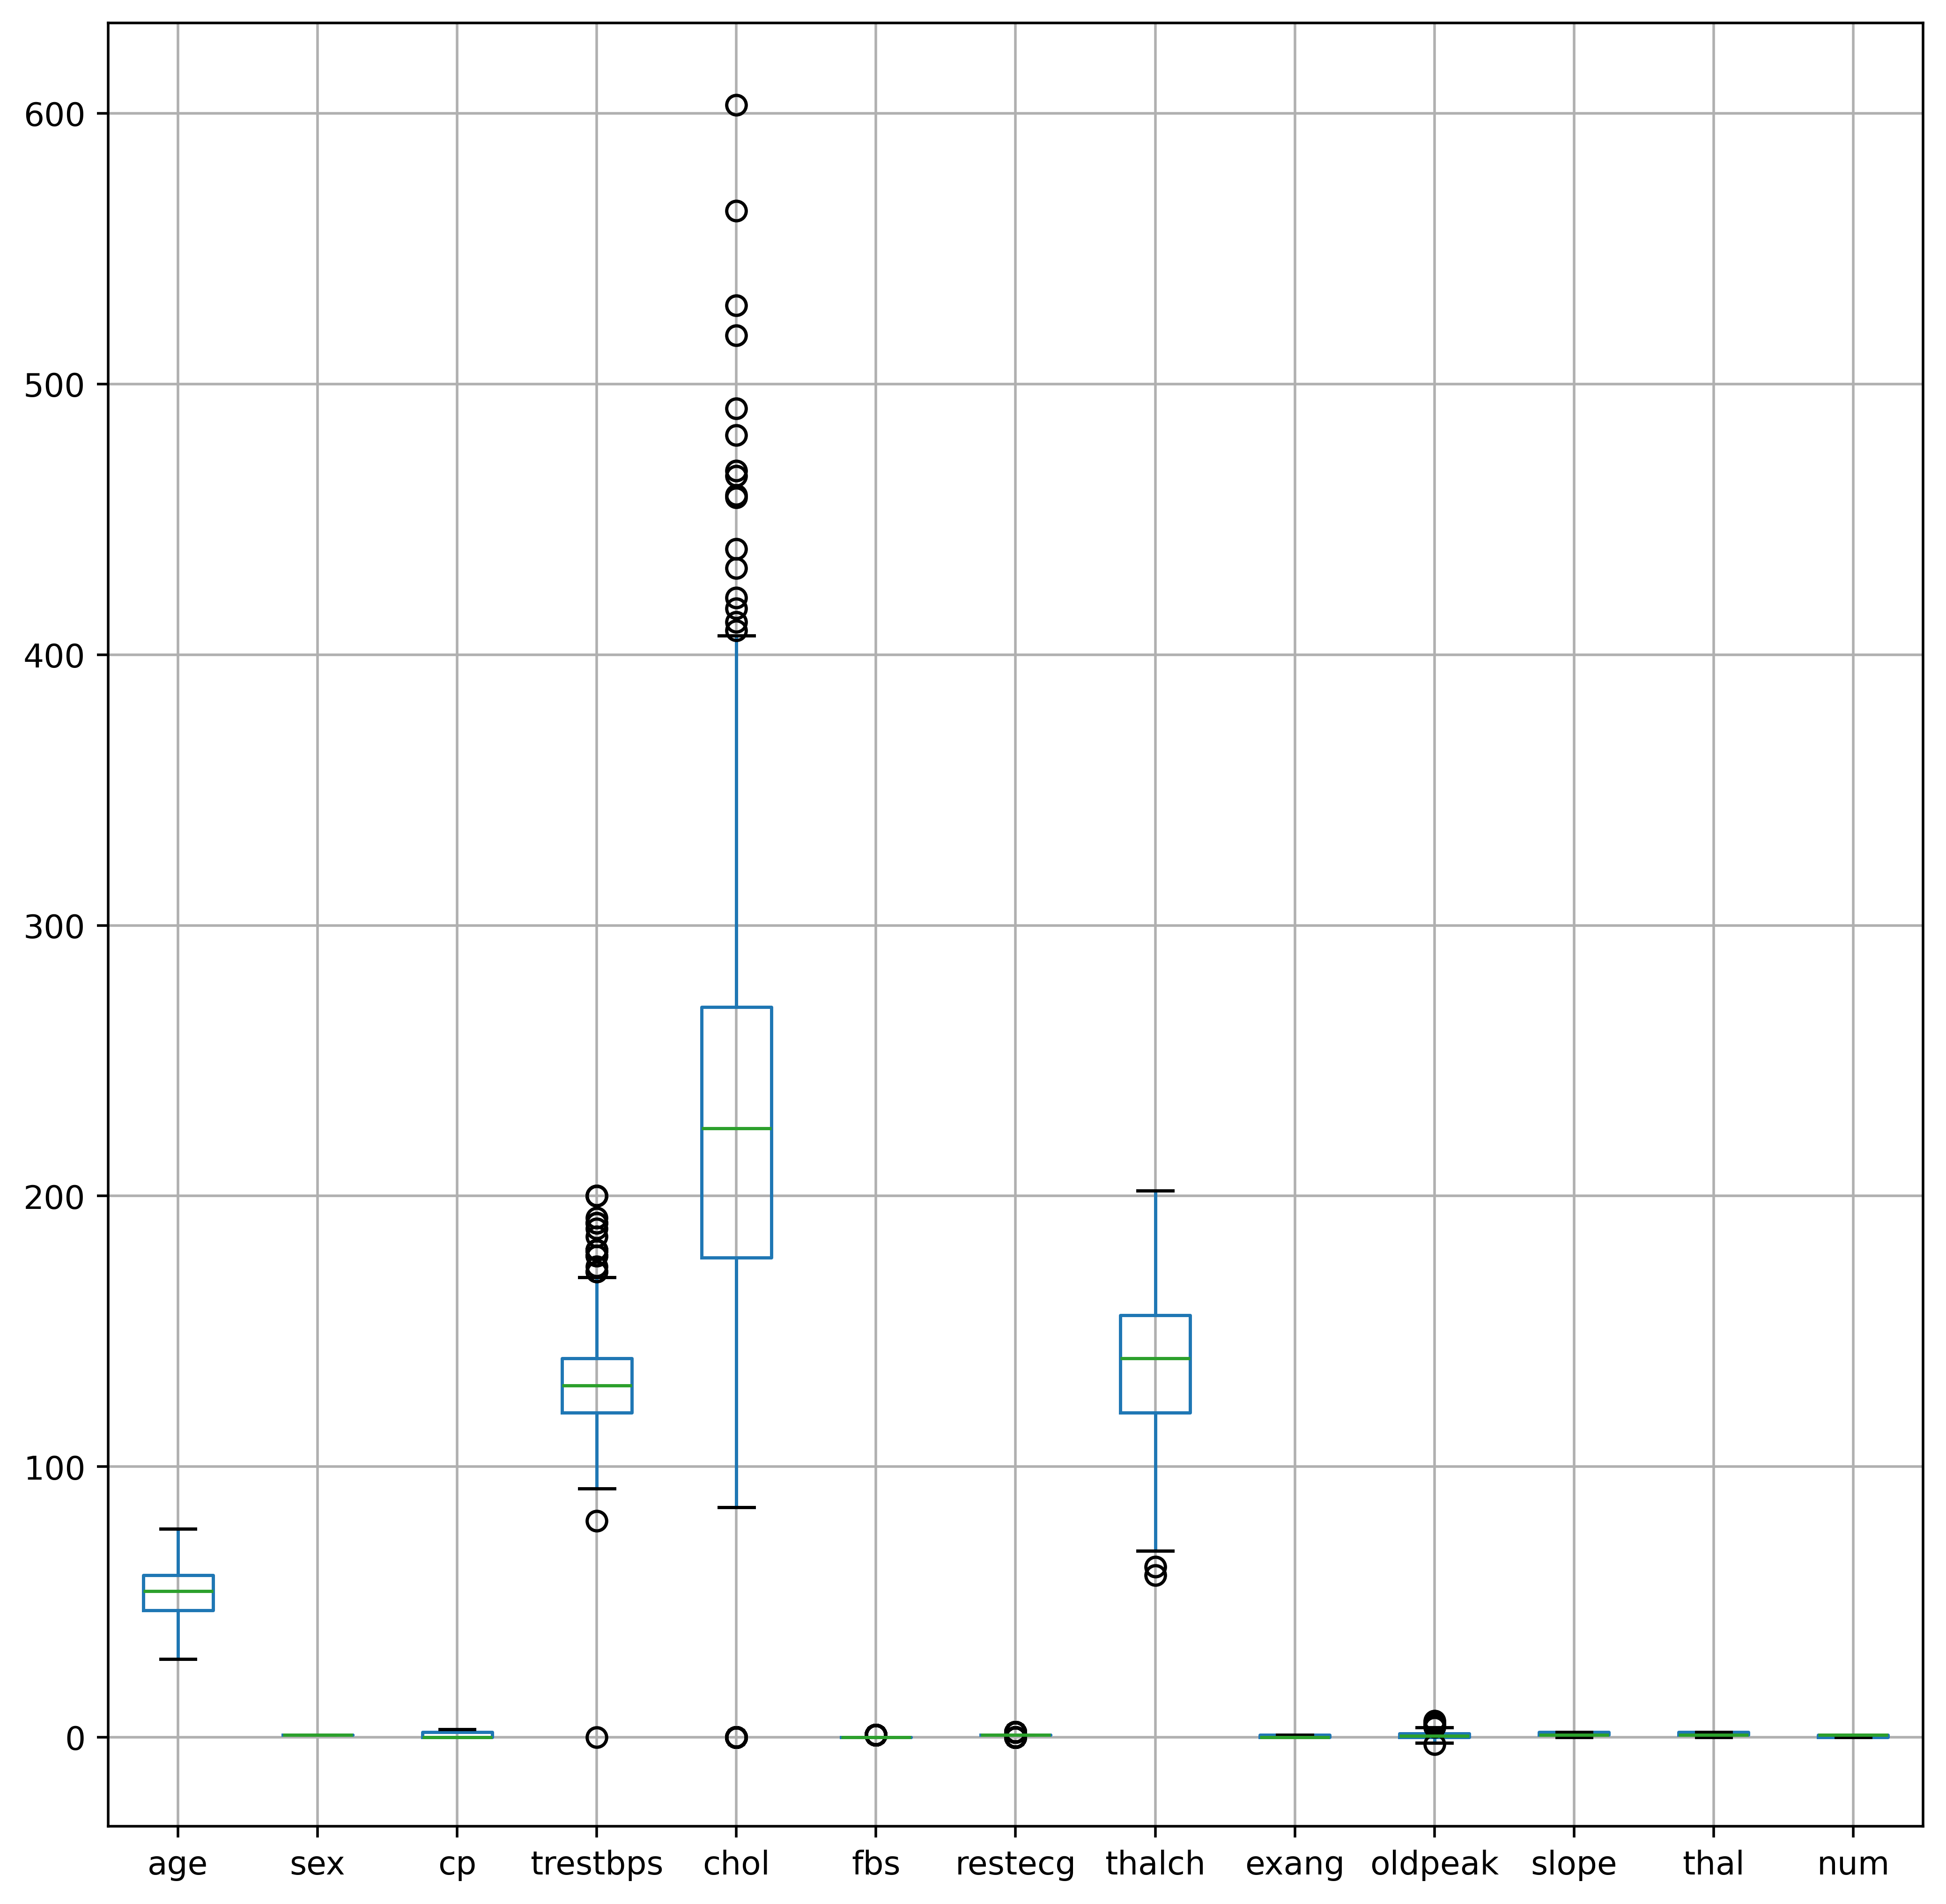

In [51]:
df.boxplot()
plt.show()

In [22]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df


# Visualizations

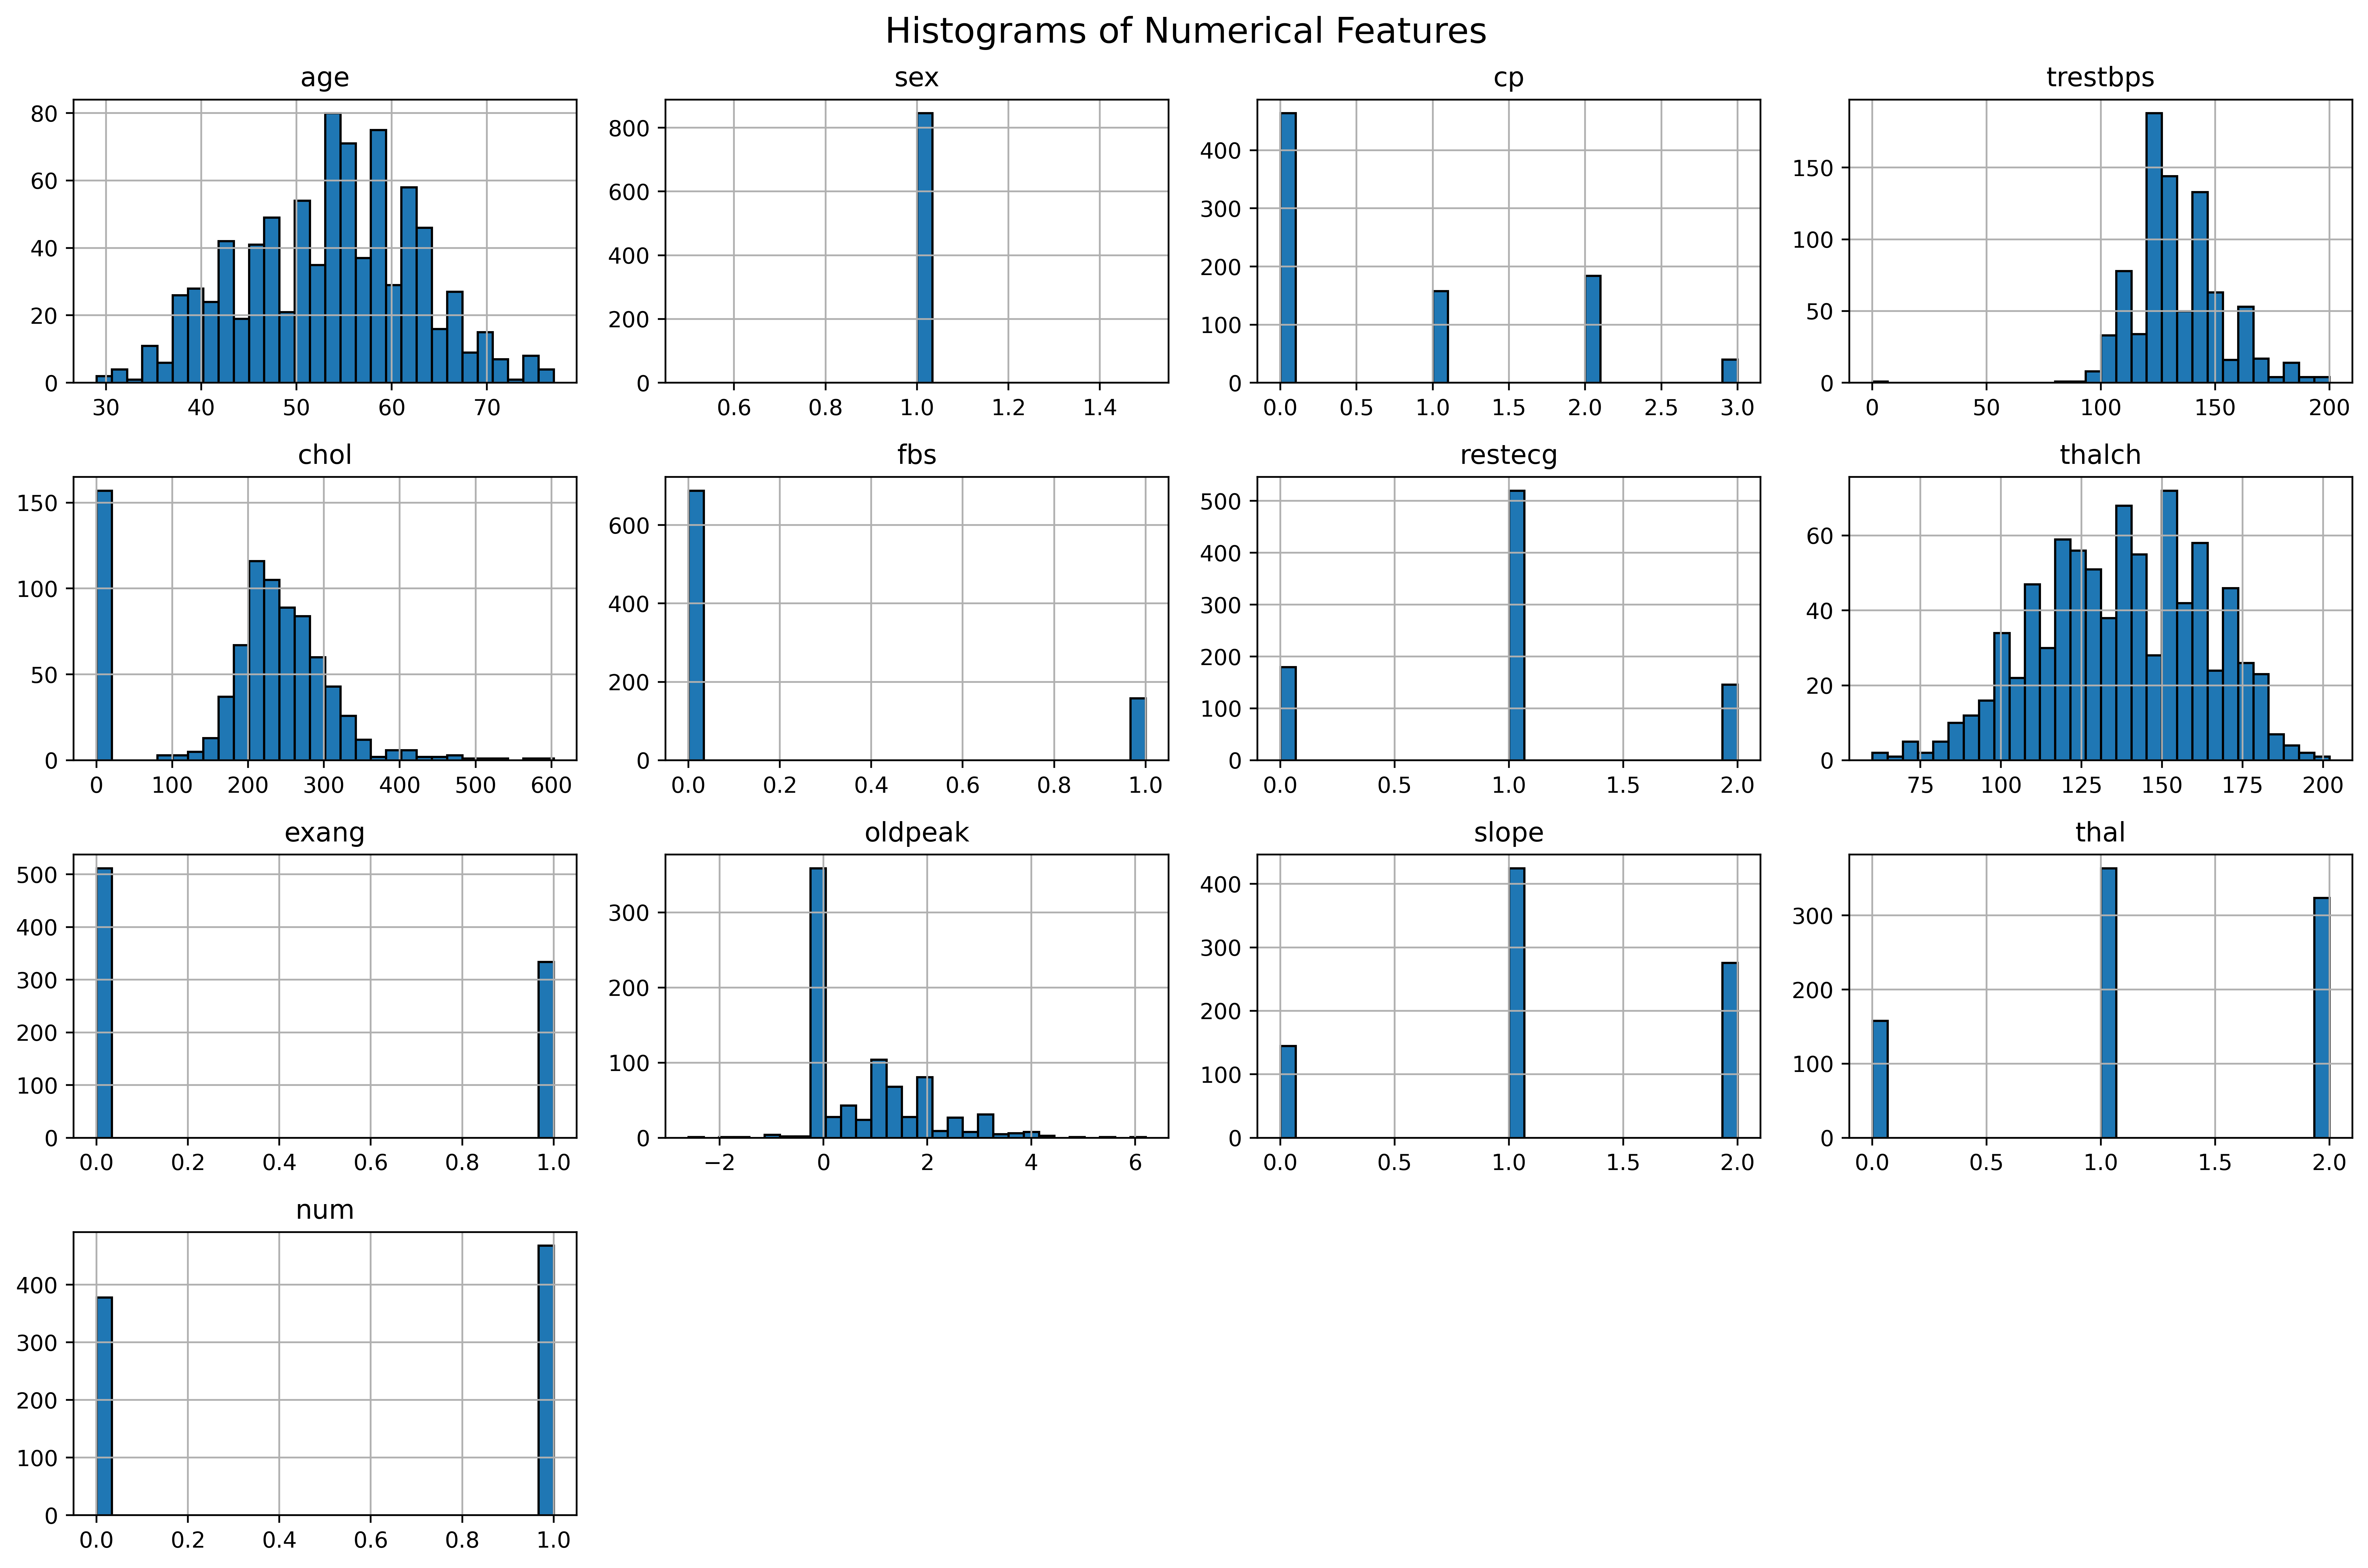

In [23]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


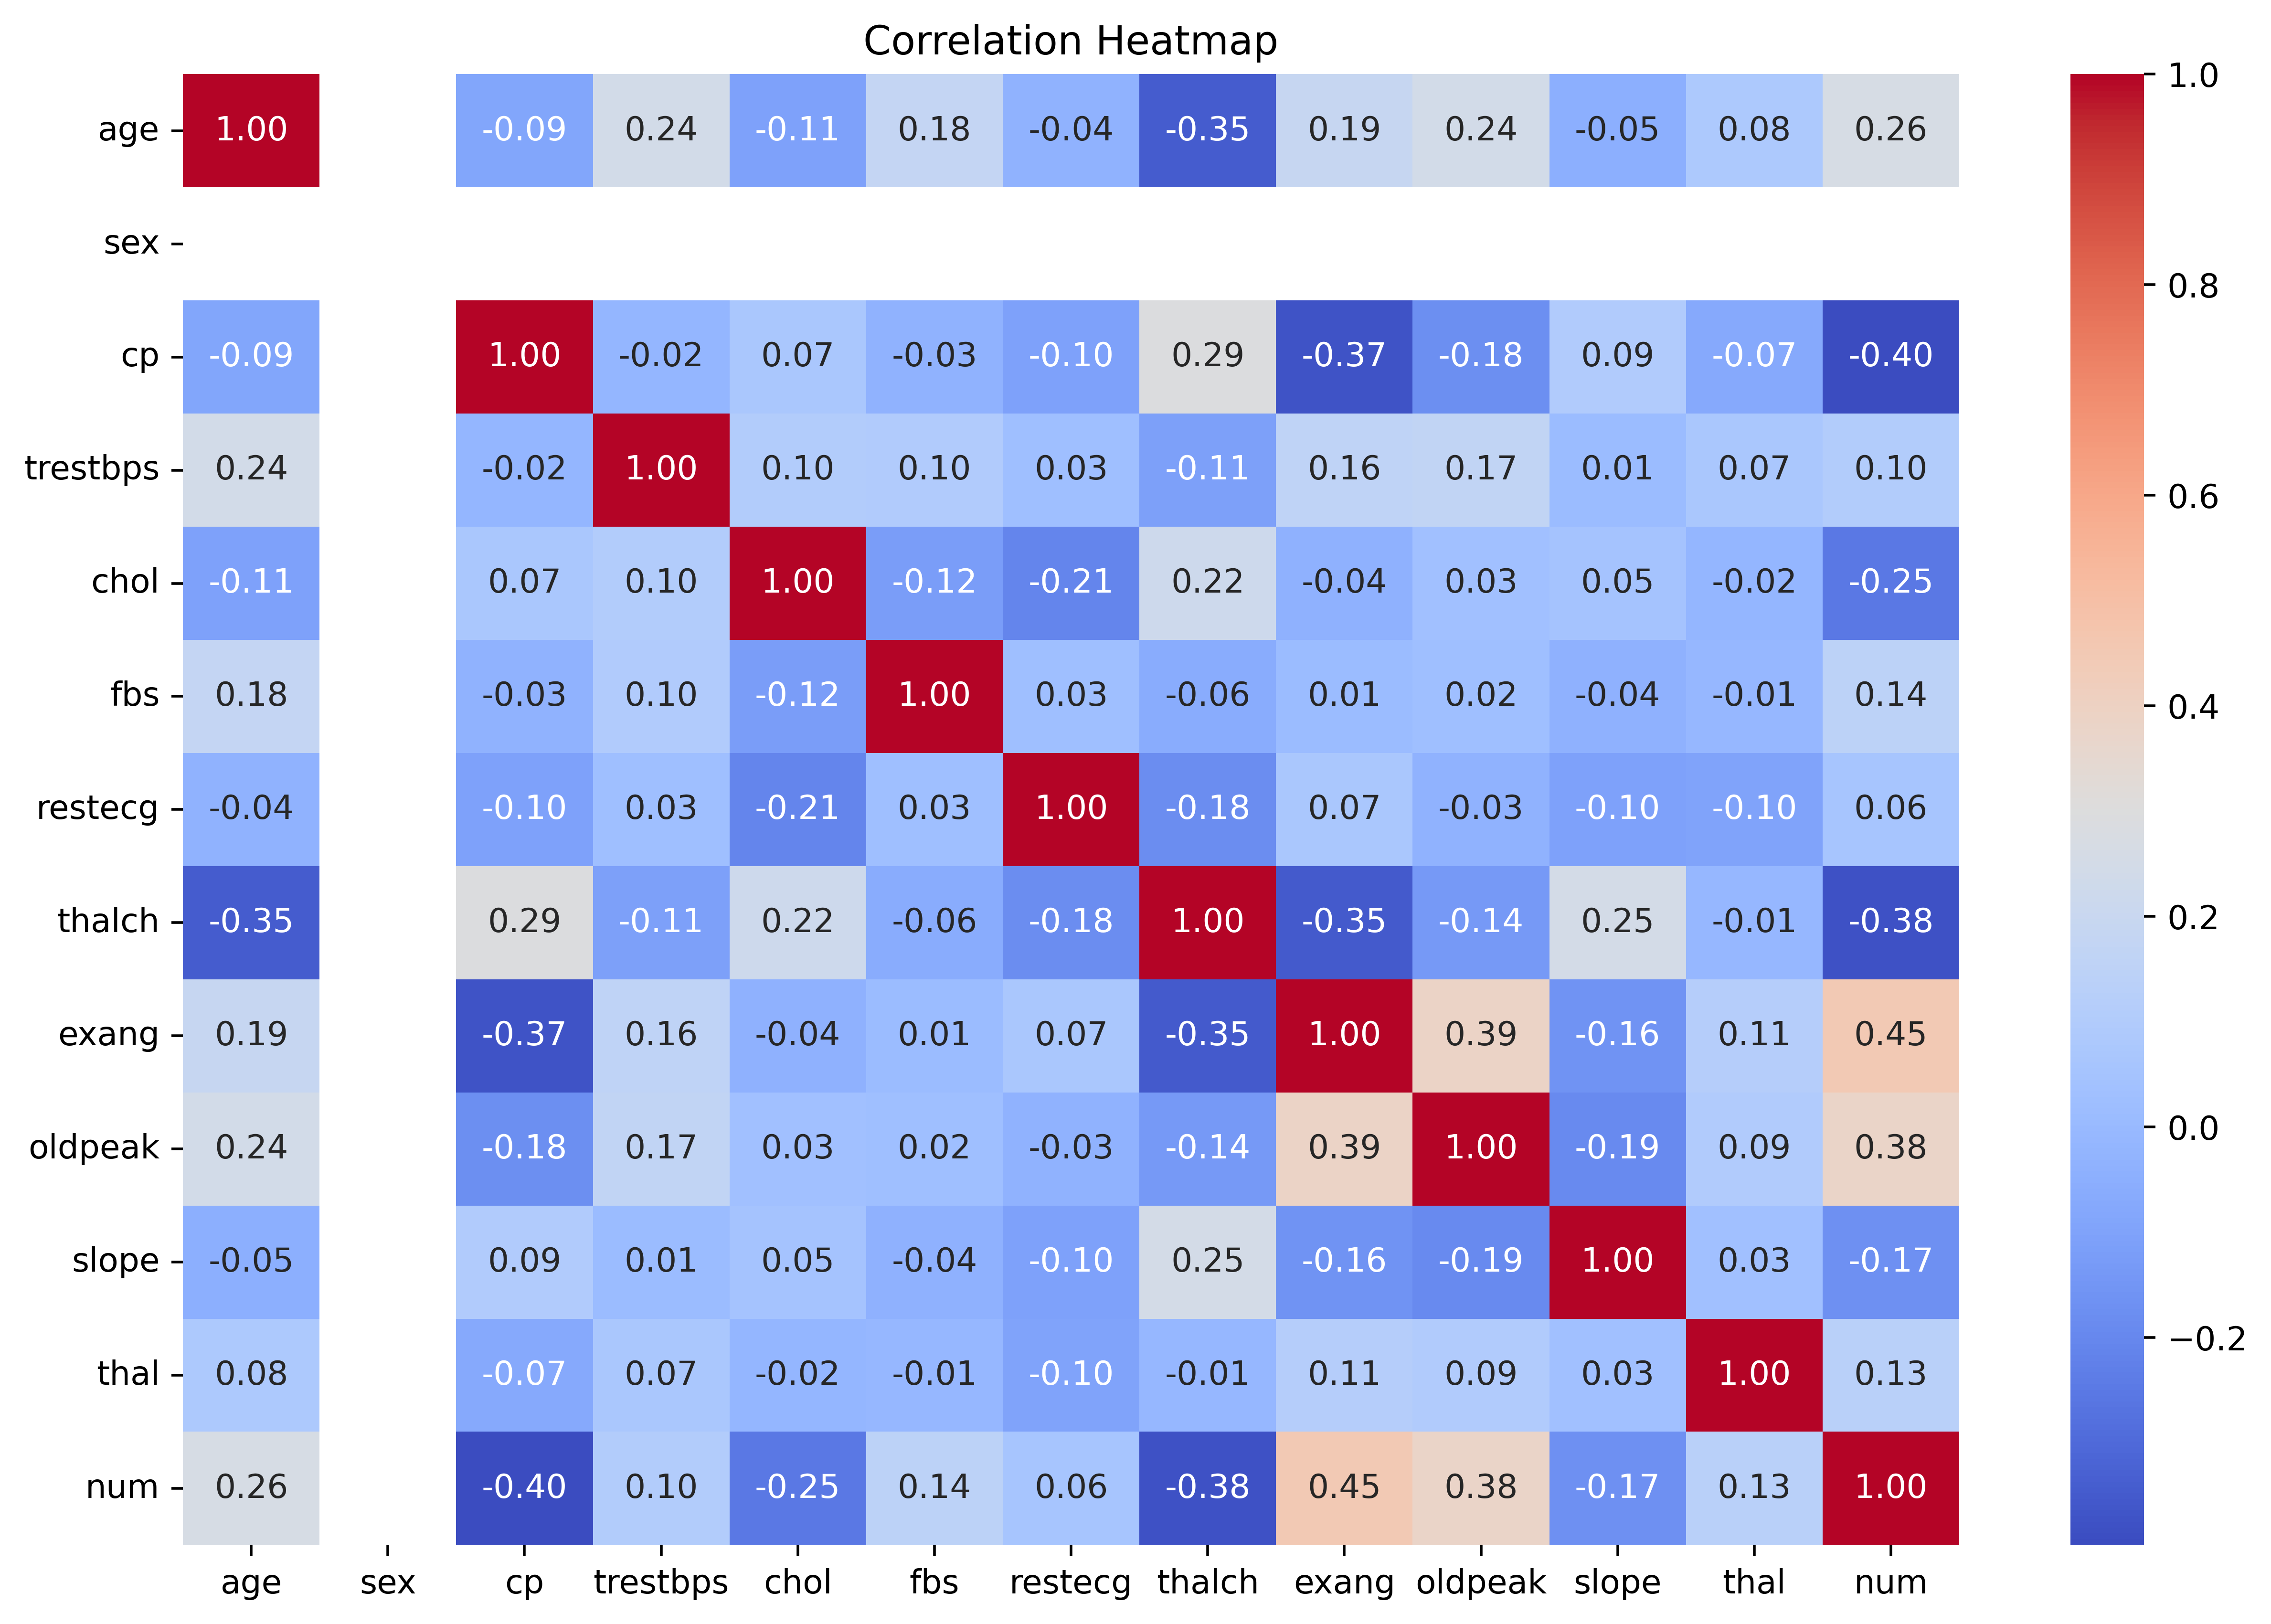

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [25]:
x=df.drop('num',axis=1)
y=df['num']

In [26]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [28]:
dt = DecisionTreeClassifier(criterion='gini')

dt.fit(x_train,y_train)
ypred = dt.predict(x_test)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

# Model Evalution

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        80
           1       0.72      0.80      0.76        90

    accuracy                           0.73       170
   macro avg       0.73      0.73      0.73       170
weighted avg       0.73      0.73      0.73       170



In [31]:
print(df['num'].value_counts())


num
1    468
0    378
Name: count, dtype: int64


In [32]:
confusion_matrix(y_test,ypred)

array([[52, 28],
       [18, 72]])

In [33]:
print('Training accuracy: ', dt.score(x_train,y_train))
print('Testing Accuracy: ', dt.score(x_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.7294117647058823


In [34]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [35]:
#tree.plot_tree(dt, feature_names=x.columns,class_names=df['num'].unique(), filled=True)


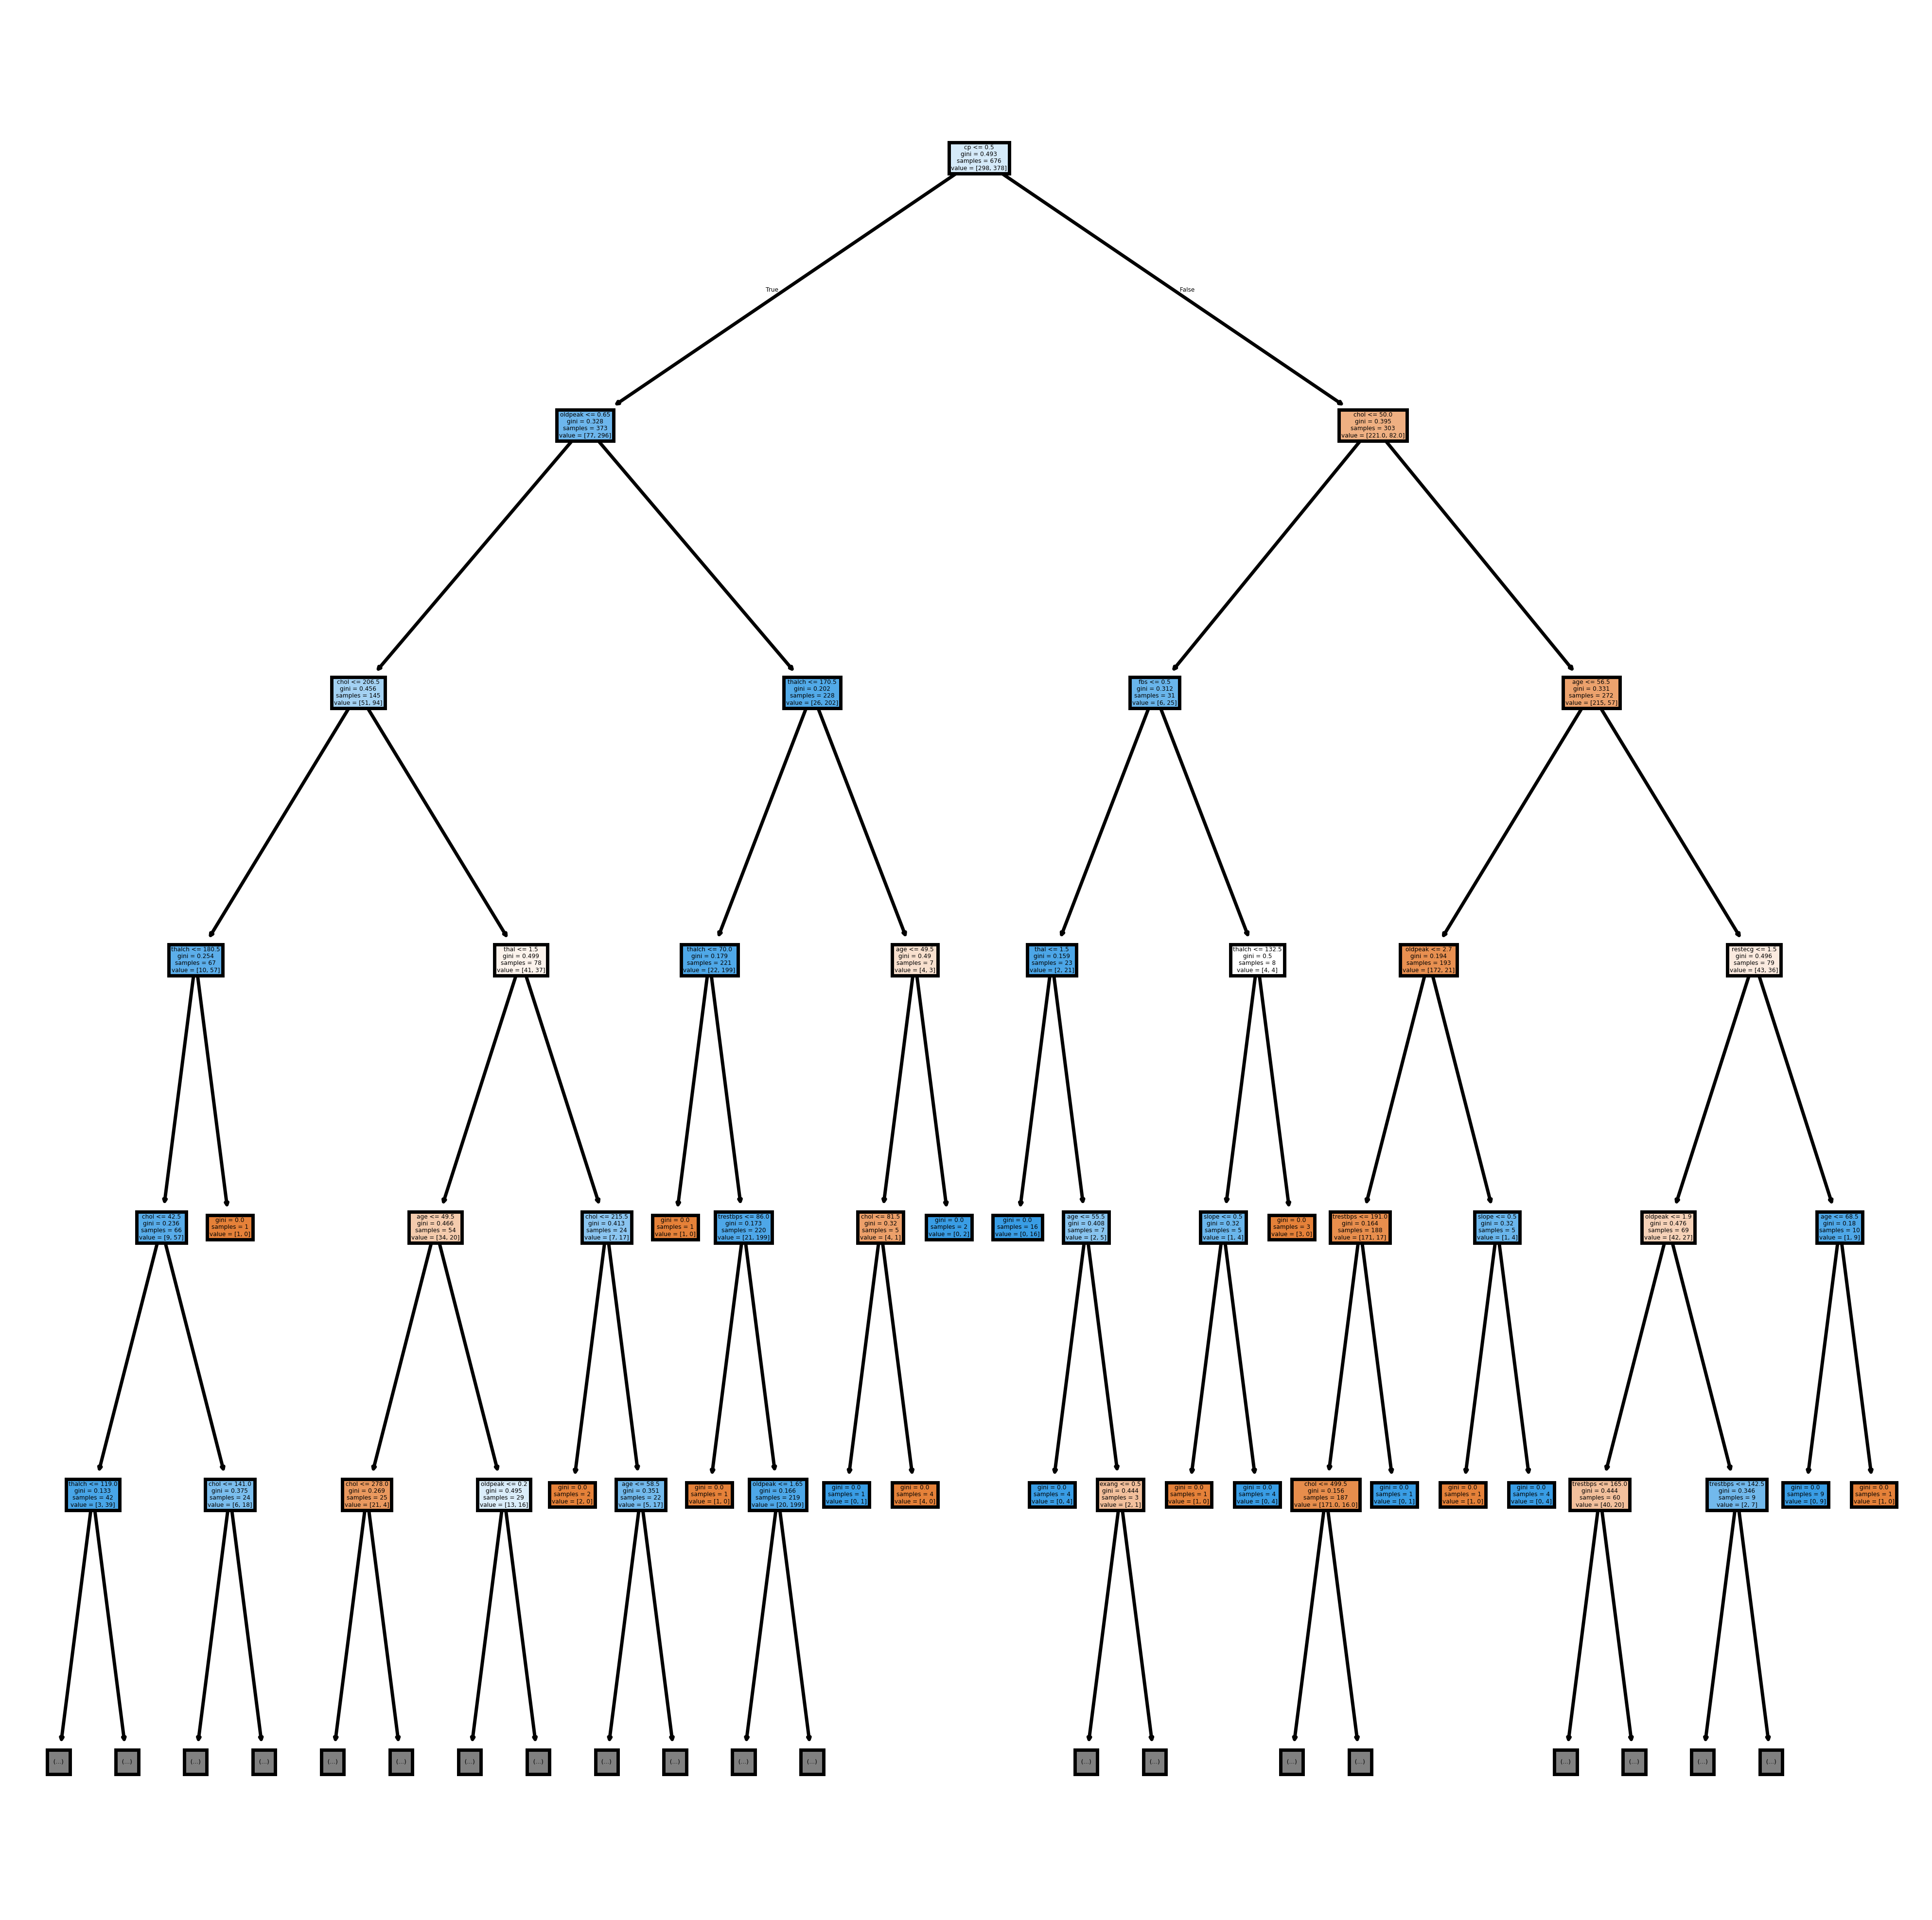

In [36]:
tree.plot_tree(dt, feature_names=x.columns,max_depth=5, filled=True)
plt.show()

In [37]:
dt.feature_importances_ #It return information gain of all columns

array([0.11745132, 0.        , 0.28532692, 0.05519907, 0.20135656,
       0.03065165, 0.04766809, 0.07837468, 0.02540181, 0.07948481,
       0.02442991, 0.05465519])

# Hyperparameter tuning

In [38]:

DecisionTreeClassifier()


DecisionTreeClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
''''params = {
    'criterion' : ["Precision","Recall","F1","Support","Accuracy"],
    'max_depth' : [3,5,7,9,11],# Any Nuber 
    'splitter' :['best','random']
}'''


'\'params = {\n    \'criterion\' : ["Precision","Recall","F1","Support","Accuracy"],\n    \'max_depth\' : [3,5,7,9,11],# Any Nuber \n    \'splitter\' :[\'best\',\'random\']\n}'

In [41]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [42]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, 
                    cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [43]:
#grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,verbose=1)

In [44]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [46]:
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [47]:
dtr = DecisionTreeClassifier(criterion='gini',
                           max_depth=4,min_samples_split= 10)

In [48]:
dtr.fit(x_train,y_train)
ypred  = dtr.predict(x_test)

In [52]:
dtr.score(x_train,y_train),dtr.score(x_test,y_test)

(0.834319526627219, 0.8117647058823529)

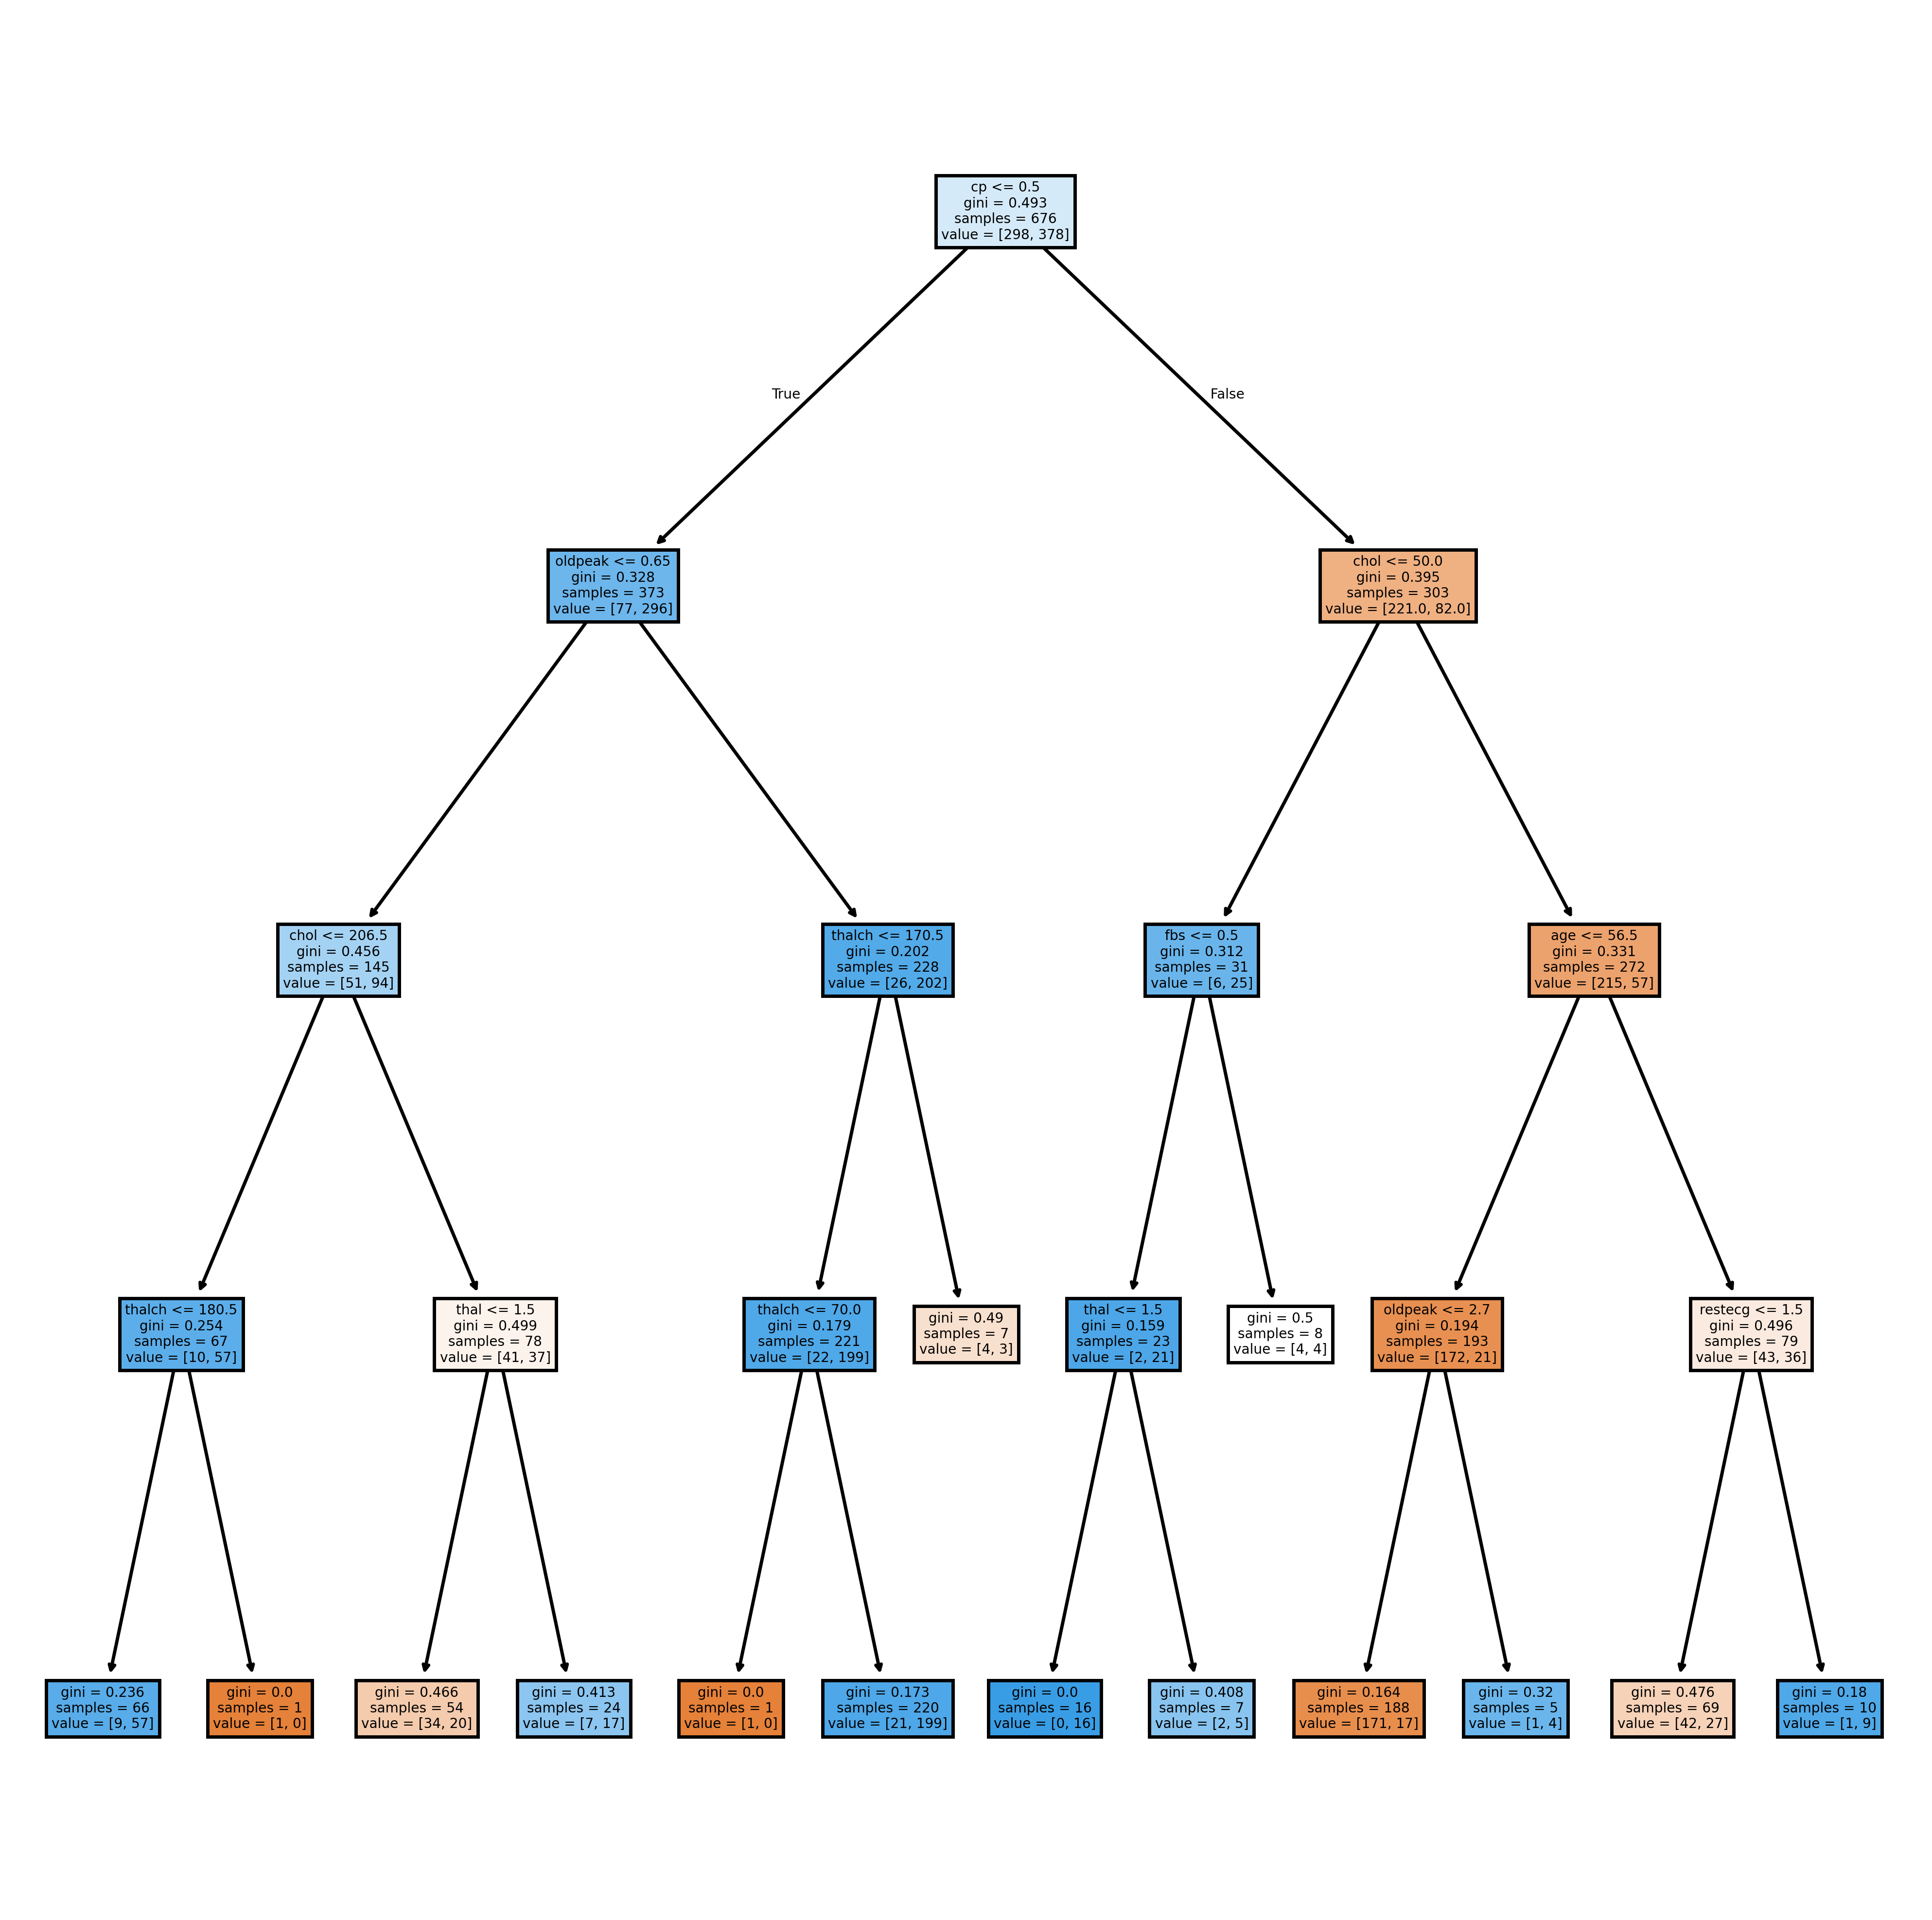

In [50]:
tree.plot_tree(dtr, feature_names=x.columns,filled=True)
plt.show()

# Conclusion



 I worked on the Heart Disease dataset and developed a Decision Tree classification model to predict the presence of heart disease.

The major steps I followed include:

Data Loading and Exploration: I imported necessary libraries, loaded the dataset, checked for missing values, duplicates, and irrelevant features, and cleaned the data accordingly.

Outlier Detection and Removal: I applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. This helped in improving the quality of the data and ensuring that the model is not affected by extreme values.

Model Development: I selected relevant features and trained a Decision Tree model to classify the data. I split the dataset into training and testing sets, trained the model, and evaluated its performance using appropriate metrics.

Visualization and Analysis: I used plots to explore the data distribution and to visualize the impact of outlier removal and model predictions.

Through these steps, I successfully built a Decision Tree model, focusing on data cleaning, especially outlier removal, and preparing the dataset for better classification results. 


# INTERVIEW QUESTIONS


## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?



Decision Trees have several hyperparameters that control how deep, complex, and generalizable the model becomes.

| **Hyperparameter**      | **Meaning / Function**                                                    | **Effect on Model**                                                                                              |
| ----------------------- | ------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **`max_depth`**         | Maximum number of levels (depth) in the tree                              | - Small depth → underfitting (too simple) <br> - Large depth → overfitting (too complex)                         |
| **`min_samples_split`** | Minimum number of samples required to split an internal node              | - Higher value → fewer splits → simpler tree <br> - Lower value → more splits → complex tree                     |
| **`min_samples_leaf`**  | Minimum number of samples required in a leaf node                         | - Prevents small, over-specific leaves <br> - Helps generalization                                               |
| **`max_features`**      | Number of features to consider when looking for the best split            | - Smaller value → more randomness → reduces overfitting <br> - Larger value → better fit but risk of overfitting |
| **`criterion`**         | Function used to measure the quality of a split (`"gini"` or `"entropy"`) | - `"gini"` (default) is faster <br> - `"entropy"` gives slightly more pure splits                                |
| **`max_leaf_nodes`**    | Maximum number of terminal nodes                                          | - Limits complexity directly                                                                                     |
| **`random_state`**      | Controls randomness of the algorithm                                      | - For reproducibility (same result each run)                                                                     |



## 2. What is the difference between the Label encoding and One-hot encoding?



| Aspect               | Description                                                                                              |
| -------------------- | -------------------------------------------------------------------------------------------------------- |
| **What it does**     | Assigns each unique category a **numeric label** (integer).                                              |
| **Example**          | `Color = [Red, Blue, Green]` → `Red=0`, `Blue=1`, `Green=2`                                              |
| **Use case**         | Works well for **ordinal** data (where order matters). <br> e.g., `Low < Medium < High`.                 |
| **Problem**          | For **nominal** data (no order), model may **misinterpret numeric labels** as having order or magnitude. |
| **Library Function** | `from sklearn.preprocessing import LabelEncoder`                                                         |


| Aspect               | Description                                                                                |
| -------------------- | ------------------------------------------------------------------------------------------ |
| **What it does**     | Creates **separate binary columns** (0/1) for each category.                               |
| **Example**          | `Color = [Red, Blue, Green]` →  <br> Red → `[1,0,0]`, Blue → `[0,1,0]`, Green → `[0,0,1]`  |
| **Use case**         | Suitable for **nominal** (unordered) categorical data.                                     |
| **Problem**          | Increases feature space (especially with many categories → “**curse of dimensionality**”). |
| **Library Function** | `from sklearn.preprocessing import OneHotEncoder` or `pd.get_dummies()`                    |
